# <center>Clustering Performance Analysis</center>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [13]:
# Import the CSV
df = pd.read_csv("dataset_faithful.csv",header=None)
df = df.iloc[:,1:]
df = df.rename(columns={1: 'Eruption(mins)', 2: 'Waiting(mins)'})
df.head()

,Eruption(mins),Waiting(mins)
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [12]:
df.shape

(272, 2)

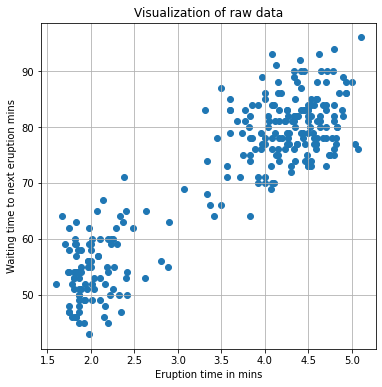

In [14]:
#Plot the data
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel("Eruption time in mins")
plt.ylabel("Waiting time to next eruption mins")
plt.title("Visualization of raw data")
plt.grid()
plt.show()

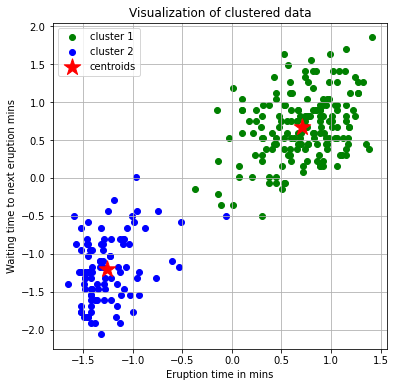

In [16]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# K-Means clustering
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(6,6))
plt.scatter(X_std[km.labels_ == 0,0],X_std[km.labels_ == 0,1],c="green",label="cluster 1")
plt.scatter(X_std[km.labels_ == 1,0],X_std[km.labels_ == 1,1],c="blue", label="cluster 2")
plt.scatter(centroids[:,0], centroids[:,1], marker='*',s=300,c='r',label='centroids')
plt.xlabel("Eruption time in mins")
plt.ylabel("Waiting time to next eruption mins")
plt.title("Visualization of clustered data")
plt.grid()
plt.legend()
plt.show()

In [17]:
silhouette_score(X_std, labels=km.labels_)

0.7451774401188772

In [20]:
silhouette_samples(X_std, labels=km.labels_)

array([0.65754514, 0.83888584, 0.43063115, 0.68574112, 0.80547175,
       0.61400522, 0.76714711, 0.67406565, 0.83888874, 0.80475009,
       0.84166665, 0.75924986, 0.79878225, 0.79325774, 0.80655224,
       0.82756881, 0.72363345, 0.79093364, 0.81224958, 0.81206129,
       0.83328279, 0.79325774, 0.58333755, 0.01068684, 0.74503579,
       0.67837347, 0.84055051, 0.75408093, 0.72930166, 0.81900786,
       0.71523379, 0.79876521, 0.06966491, 0.78753375, 0.64928882,
       0.84153838, 0.8107165 , 0.78958206, 0.79109652, 0.7396519 ,
       0.82298602, 0.8091625 , 0.81197984, 0.79964703, 0.72255963,
       0.57737036, 0.25333714, 0.83725131, 0.81566705, 0.79242211,
       0.74390444, 0.74352935, 0.84166665, 0.78958206, 0.83134979,
       0.78367299, 0.51451942, 0.66964748, 0.79507456, 0.82388494,
       0.76608617, 0.81457996, 0.80428871, 0.79694818, 0.77127925,
       0.72001964, 0.7948329 , 0.7943294 , 0.6274275 , 0.71480027,
       0.78948436, 0.83353462, 0.81752426, 0.60813149, 0.72481

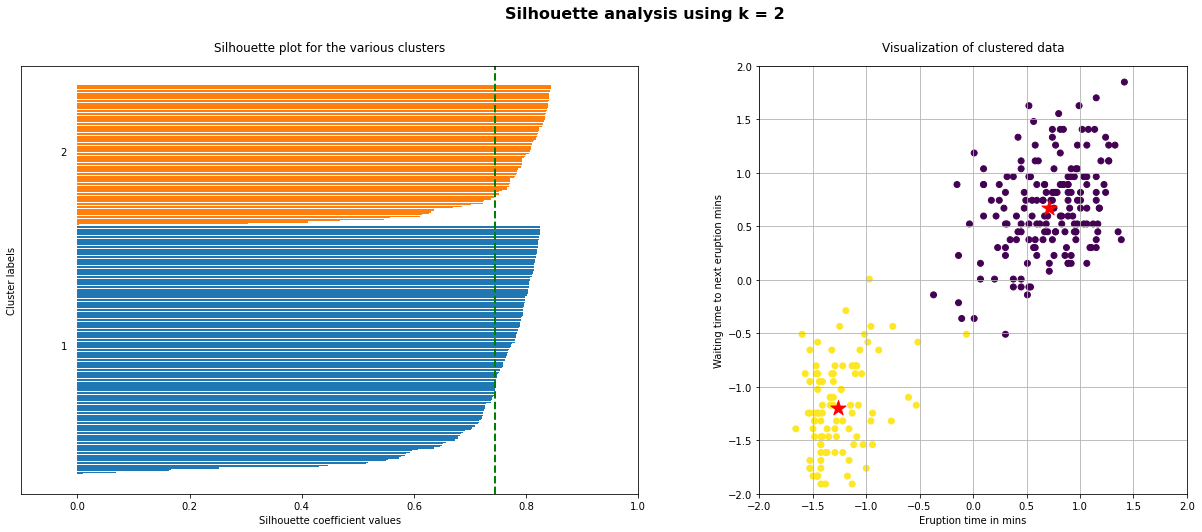

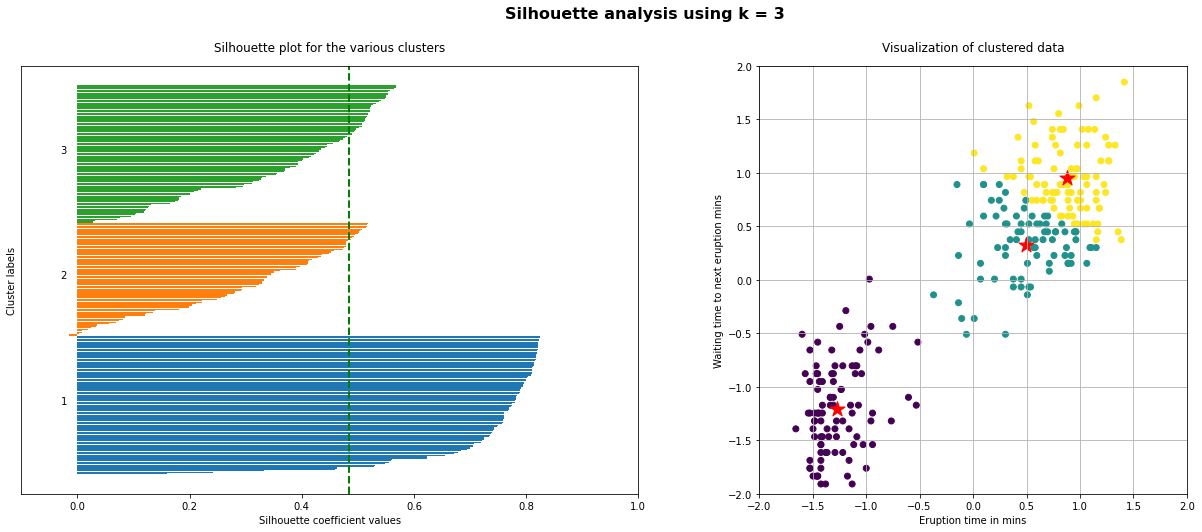

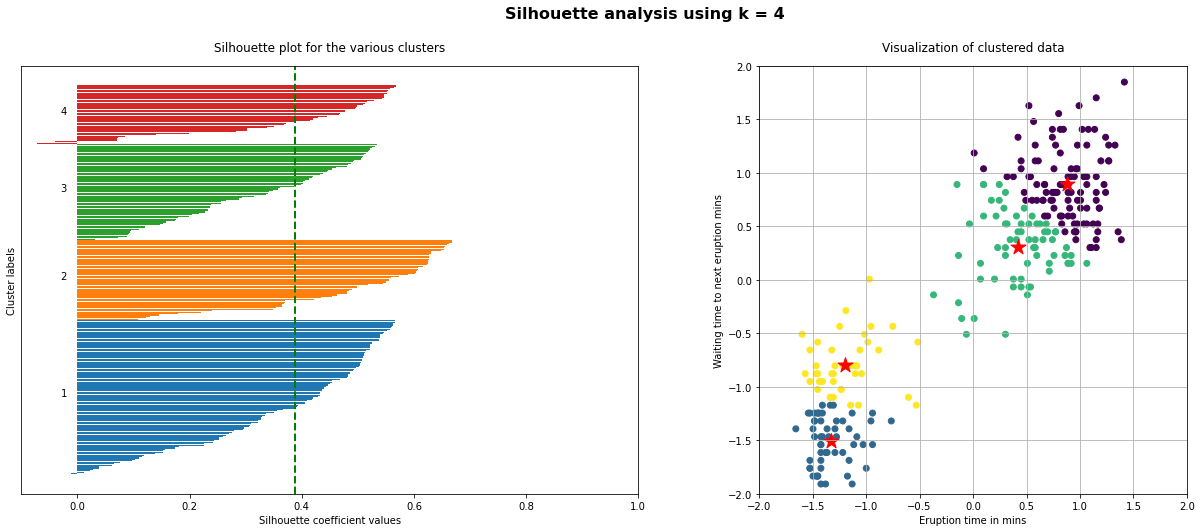

In [22]:
# Experiment with the number of clusters and compare the silhouette_scores
for i, k in enumerate([2,3,4]):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)

    #kmeans
    km = KMeans(n_clusters=k, max_iter=100)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    silhouette_vals = silhouette_samples(X_std, labels)

    #silhoutte plot
    y_ticks = []
    y_lower, y_upper = 0,0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_sil_vals = silhouette_vals[labels == cluster]
        cluster_sil_vals.sort()
        y_upper += len(cluster_sil_vals)
        ax1.barh(range(y_lower,y_upper), cluster_sil_vals, edgecolor=None)
        ax1.text(-0.03, (y_lower + y_upper)/2, str(i+1))
        y_lower += len(cluster_sil_vals)

    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='g')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02)

    # scatter plot of data colored with labels
    ax2.scatter(X_std[:,0], X_std[:,1], c=labels)
    ax2.scatter(centroids[:,0], centroids[:,1], marker='*',s=250,c='r')
    ax2.set_xlim([-2,2])
    ax2.set_ylim([-2,2])
    ax2.set_xlabel("Eruption time in mins")
    ax2.set_ylabel("Waiting time to next eruption mins")
    ax2.set_title("Visualization of clustered data", y=1.02)
    ax2.grid()
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle("Silhouette analysis using k = {}".format(k),fontsize=16, fontweight='semibold',y=1.05)
    plt.show()

### Silhouette analysis on HAC

In [39]:
hac = AgglomerativeClustering(n_clusters=2)
hac_labels = hac.fit_predict(X_std)
hac_centroids = np.array([np.mean(X_std[hac_labels==label], axis=0) for label in np.unique(hac_labels)])

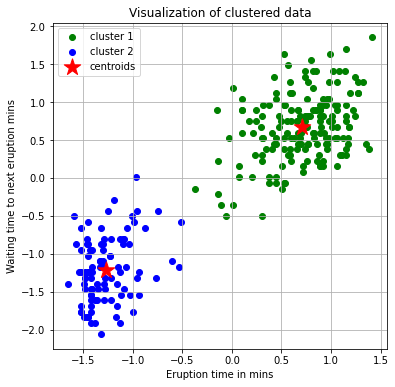

In [40]:
# Plot the clustered data
plt.figure(figsize=(6,6))
plt.scatter(X_std[hac_labels == 0,0],X_std[hac_labels == 0,1],c="green",label="cluster 1")
plt.scatter(X_std[hac_labels == 1,0],X_std[hac_labels == 1,1],c="blue", label="cluster 2")
plt.scatter(hac_centroids[:,0], hac_centroids[:,1], marker='*',s=300,c='r',label='centroids')
plt.xlabel("Eruption time in mins")
plt.ylabel("Waiting time to next eruption mins")
plt.title("Visualization of clustered data")
plt.grid()
plt.legend()
plt.show()

In [41]:
silhouette_score(X_std, hac_labels)

0.7460024896679954